In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from wordcloud import WordCloud

import acquire as aq
import prepare as pr

## 1. Spam Data

### a. Load the spam data set.




In [3]:
df = pd.read_csv('spam_clean.csv')

In [4]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

### Prepare Data

In [5]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [6]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [7]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [8]:
spam_freq.head()

to      686
a       376
call    347
you     287
your    263
dtype: int64

In [9]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [10]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()

In [12]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()

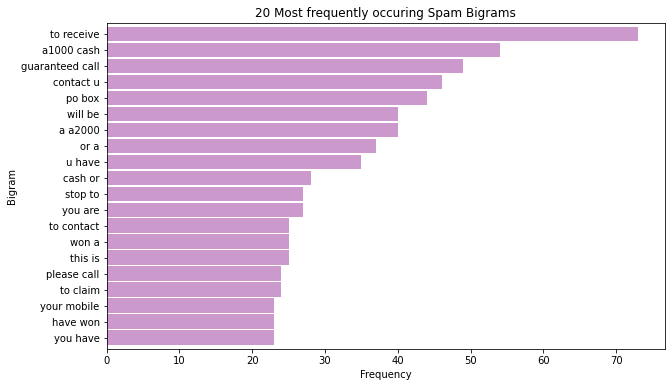

In [20]:
# Visualize the bigrams with barplot
top_20_spam = spam_bigrams.sort_values(ascending=False).head(20)

top_20_spam.sort_values().plot.barh(color='purple', alpha=0.4, width=.9, figsize=(10,6))

plt.title('20 Most frequently occuring Spam Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

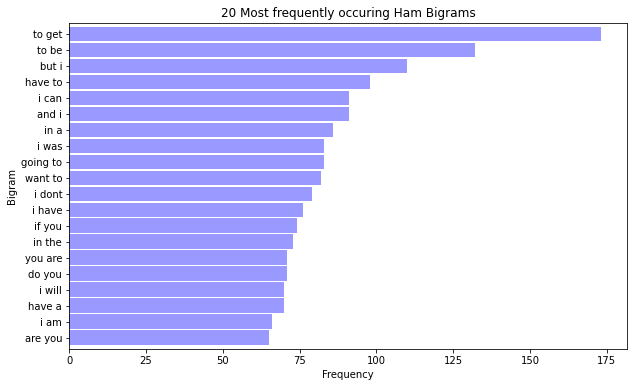

In [30]:
# Visualize the bigrams with barplot
top_20_ham = ham_bigrams.sort_values(ascending=False).head(20)

top_20_ham.sort_values().plot.barh(color='blue', alpha=0.4, width=.9, figsize=(10,6))

plt.title('20 Most frequently occuring Ham Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

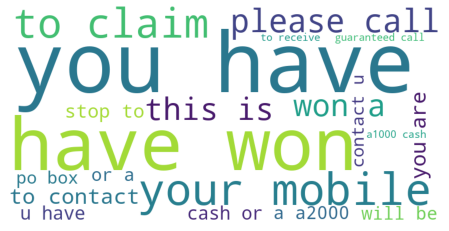

In [28]:
# Visualize spam with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam.to_dict().items()}
img = WordCloud(background_color='white',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

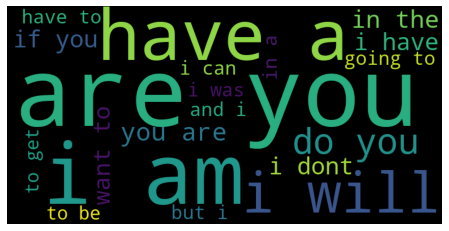

In [32]:
# Visualize ham with wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham.to_dict().items()}
img = WordCloud(background_color='black',width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### c. Is there any overlap in the bigrams for the spam data and the ham data?

Text(0.5, 1.06, 'Ham vs Spam count for the top 20 most frequent words')

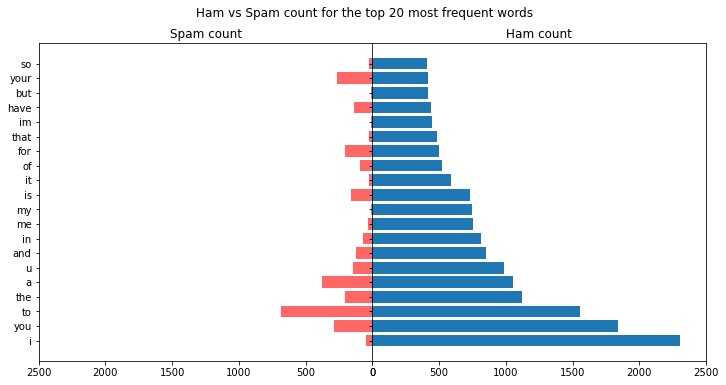

In [35]:
#create fig and subplot
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()

# data series
s_ham = word_counts.sort_values('ham', ascending=False).head(20)['ham']
s_spam = word_counts.sort_values('ham', ascending=False).head(20)['spam']

# create the charts
axes[1].barh(s_ham.index, s_ham.values)
axes[0].barh(s_spam.index, s_spam.values, color = 'red', alpha = 0.6)

#invert the first axis
axes[0].invert_xaxis()
axes[0].set_xlim(2500, 0)
axes[1].set_xlim(0, 2500)

# set titles
axes[0].set_title('Spam count')
axes[1].set_title('Ham count')

plt.subplots_adjust(wspace=0)
plt.suptitle('Ham vs Spam count for the top 20 most frequent words', y = 1.06)

- Ham messages seem to be more in first person 
- Spam messages do not seem to be as personal
- the word to seems to be common in both ham and spam 


### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [36]:
#Create the trigrams for ham and spam
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(20))
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(20))

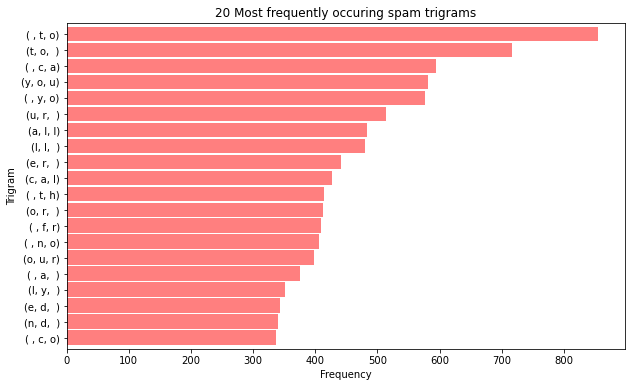

In [40]:
top_20_spam_trigrams.sort_values().plot.barh(color='red', alpha = 0.5, width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.show()

Text(0.5, 0, 'Frequency')

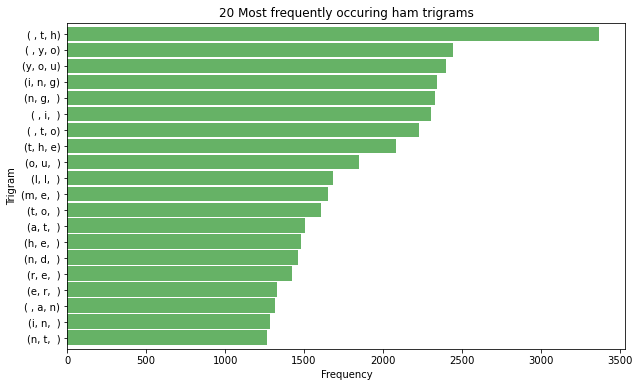

In [42]:
top_20_ham_trigrams.sort_values().plot.barh(color='green', alpha =0.6, width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.